# Titanic - Machine Learning from Disaster

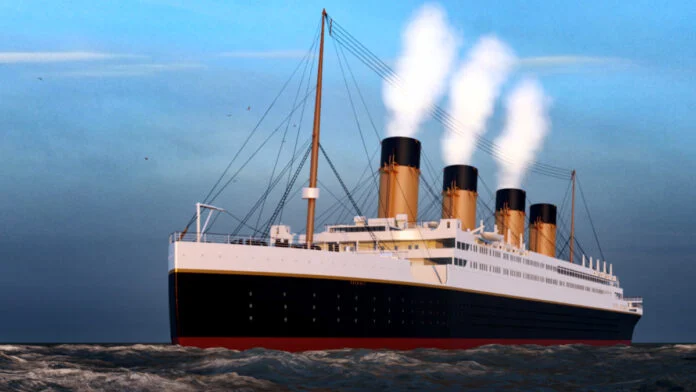

# Import

In [1]:
import numpy as np
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


# Data loading

In [2]:
train_df = pd.read_csv('train.csv')

# Processing-Pre and Data Investigation 

## Train Data

### Removing uneeded columns

In [3]:
train_df = train_df.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'])

### Dealing with null values

In [4]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

### Filling age null values with normal distribution of the age column

In [5]:
index = train_df[train_df.Age.isna()].index
value = np.random.normal(loc=train_df.Age.mean(), scale=train_df.Age.std(), size=train_df.Age.isna().sum())
train_df.Age.fillna(pd.Series(value, index=index), inplace=True)

### Final check of null values

In [6]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

### Dealing with categorical values

In [7]:
train_df['Sex'].replace({'male':0,'female':1},inplace=True)

In [8]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000
887,1,1,1,19.000000,0,0,30.0000
888,0,3,1,35.548545,1,2,23.4500
889,1,1,0,26.000000,0,0,30.0000


## Exploratory Data Analysis 

### Correlation matrix

<AxesSubplot:>

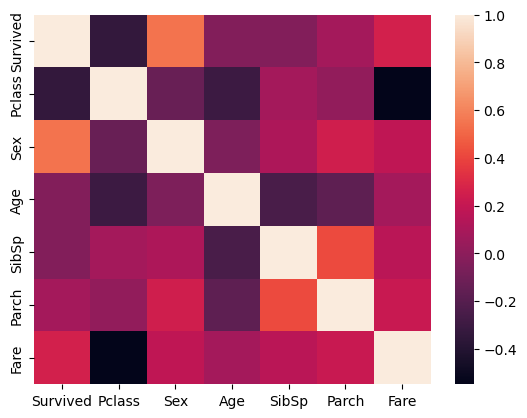

In [9]:
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix)

### Histogram of each column

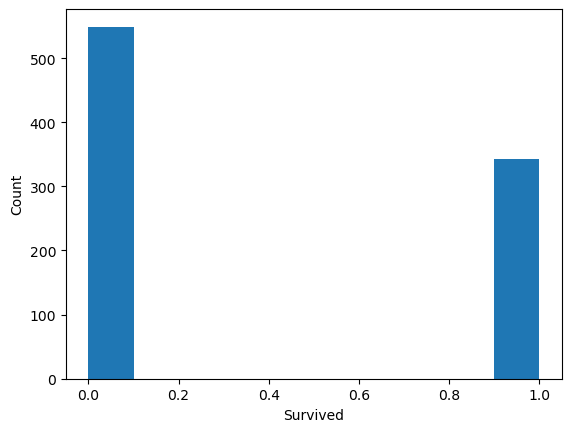

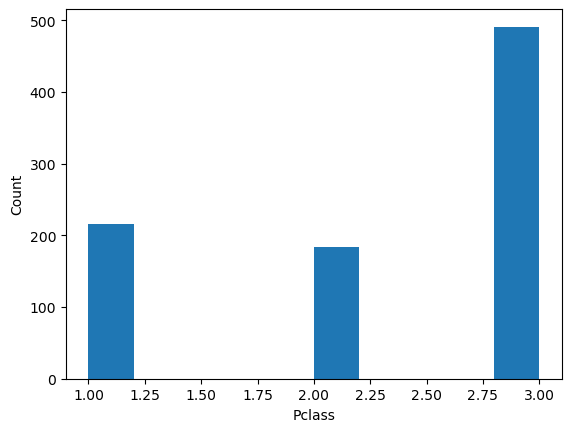

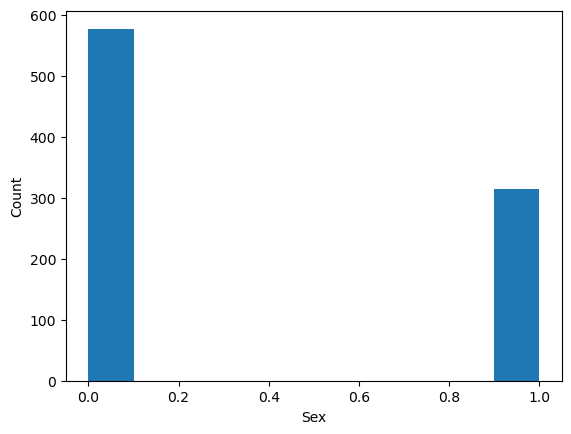

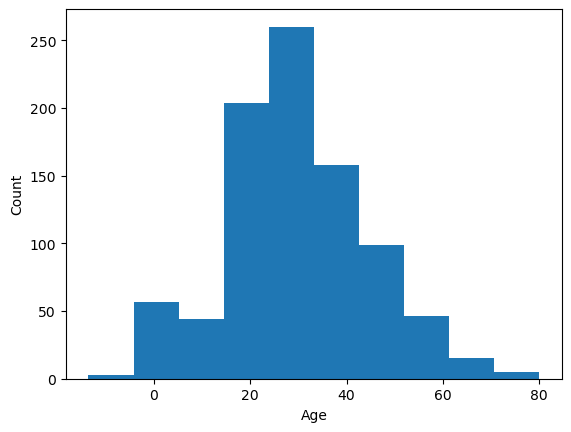

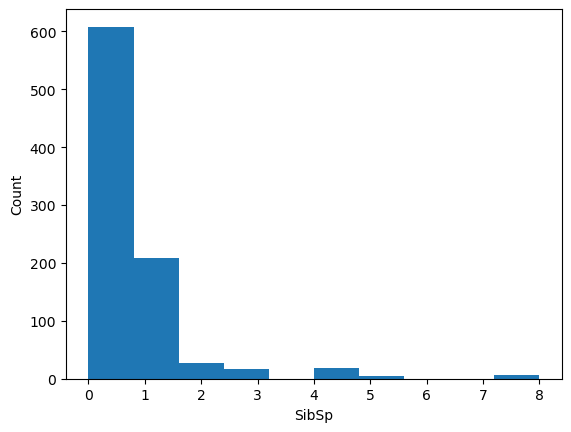

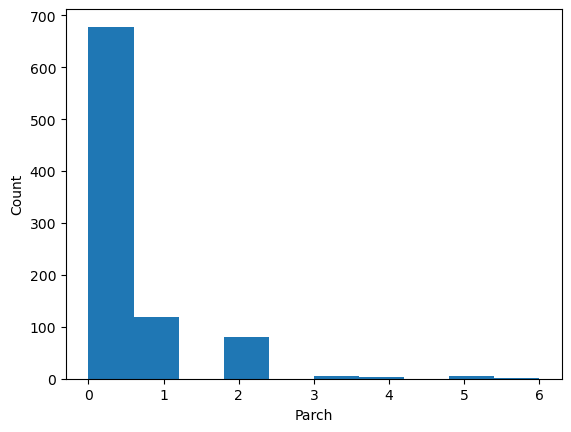

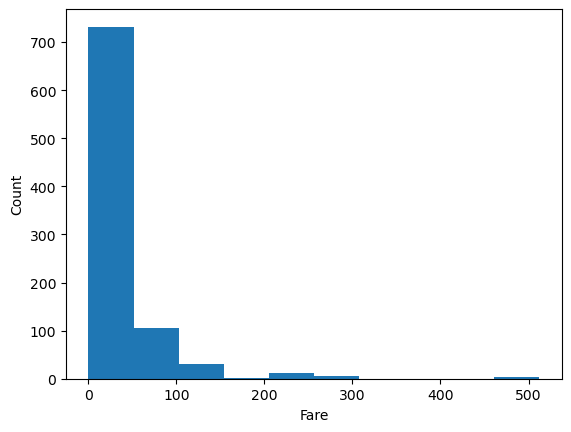

In [10]:
for col in train_df.columns:
    train_df[col].plot(kind='hist')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

### Columns and survived values

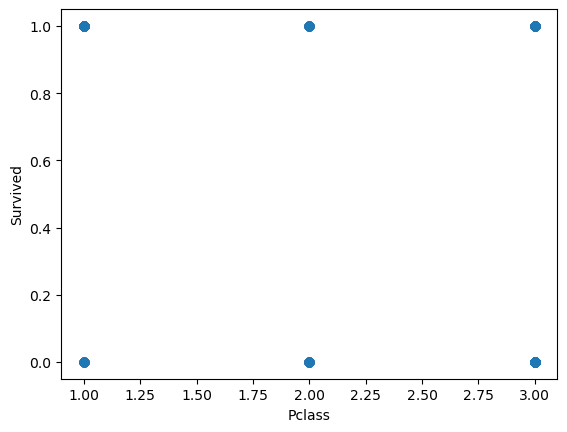

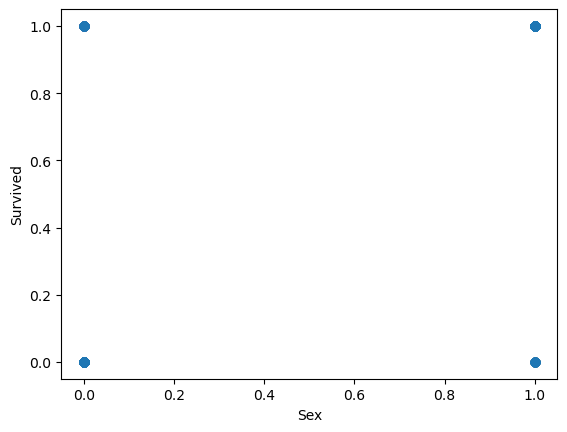

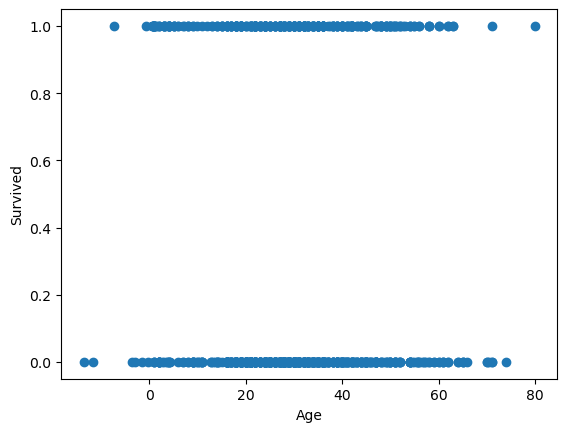

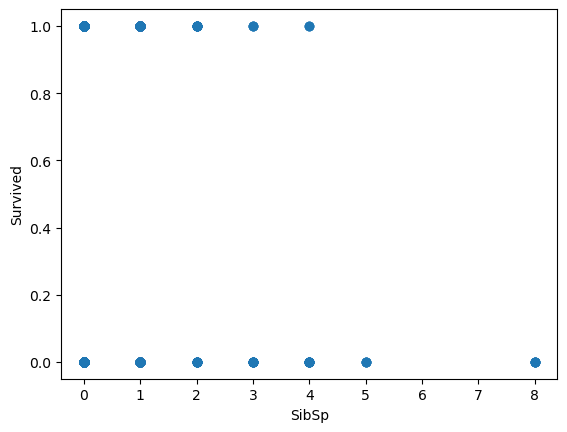

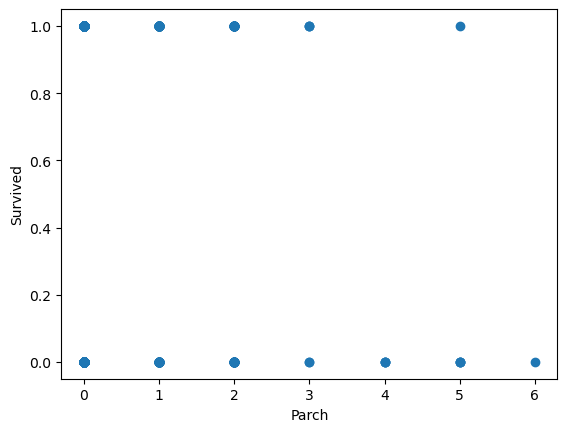

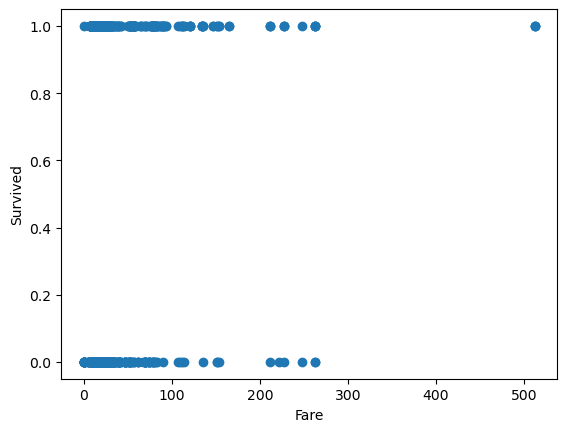

<Figure size 640x480 with 0 Axes>

In [11]:
for col in train_df.columns:
  if col != 'Survived':
    plt.scatter(train_df[col], train_df['Survived'])
    plt.xlabel(col)
    plt.ylabel('Survived')
    plt.show()
    plt.cla()
    plt.clf()

### Normalize the data 

In [12]:
def Data_Frame_Normalization(data):
    result = data.copy()
    for feature in data.columns:
        max_value = data[feature].max()
        min_value = data[feature].min()
        result[feature] = (data[feature] - min_value) / (max_value - min_value)
    return result

### Normalize the train data

In [13]:
train_df = Data_Frame_Normalization(train_df)

In [14]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,0.380376,0.125,0.000000,0.014151
1,1.0,0.0,1.0,0.551307,0.125,0.000000,0.139136
2,1.0,1.0,1.0,0.423109,0.000,0.000000,0.015469
3,1.0,0.0,1.0,0.519257,0.125,0.000000,0.103644
4,0.0,1.0,0.0,0.519257,0.000,0.000000,0.015713
...,...,...,...,...,...,...,...
886,0.0,0.5,0.0,0.433792,0.000,0.000000,0.025374
887,1.0,0.0,1.0,0.348326,0.000,0.000000,0.058556
888,0.0,1.0,1.0,0.525117,0.125,0.333333,0.045771
889,1.0,0.0,0.0,0.423109,0.000,0.000000,0.058556


## Training and Testing stage

In [15]:
Models_Results = dict()

### Split the data into train and test sets

In [16]:
x = train_df.drop('Survived',axis=1)
y = train_df['Survived']
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.25)

### Target Names

In [17]:
target_names = ['Not Survived', 'Survived']

### Model performance method

In [18]:
def Print_Model_performance(model_name,model):
    prediction = model.predict(X_test)

    print(model_name)
    print("Confusion matrix:")
    print(confusion_matrix(Y_test, prediction))
    score = accuracy_score(Y_test, prediction)
    print("Accuracy score:",score)
    print("Classification report:")
    print(classification_report(Y_test, prediction, target_names=target_names))

    Models_Results[model_name] = score

### MLPClassifier

In [19]:
MLPC = MLPClassifier(hidden_layer_sizes=5,random_state=1, max_iter=200,activation='relu',learning_rate_init=0.1)
MLPC.fit(X_train,Y_train)

Print_Model_performance('MLPClassifier',MLPC)

MLPClassifier
Confusion matrix:
[[121  12]
 [ 34  56]]
Accuracy score: 0.7937219730941704
Classification report:
              precision    recall  f1-score   support

Not Survived       0.78      0.91      0.84       133
    Survived       0.82      0.62      0.71        90

    accuracy                           0.79       223
   macro avg       0.80      0.77      0.77       223
weighted avg       0.80      0.79      0.79       223



### KNeighborsClassifier

In [20]:
KNN = KNeighborsClassifier(n_neighbors=3,p=1)
KNN.fit(X_train,Y_train)

Print_Model_performance('KNeighborsClassifier',KNN)

KNeighborsClassifier
Confusion matrix:
[[119  14]
 [ 28  62]]
Accuracy score: 0.8116591928251121
Classification report:
              precision    recall  f1-score   support

Not Survived       0.81      0.89      0.85       133
    Survived       0.82      0.69      0.75        90

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


### SVC

In [21]:
SVC = make_pipeline(StandardScaler(), SVC(gamma='auto'))
SVC.fit(X_train,Y_train)

Print_Model_performance('SVC',SVC)

SVC
Confusion matrix:
[[122  11]
 [ 29  61]]
Accuracy score: 0.820627802690583
Classification report:
              precision    recall  f1-score   support

Not Survived       0.81      0.92      0.86       133
    Survived       0.85      0.68      0.75        90

    accuracy                           0.82       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



### DecisionTreeClassifier

In [22]:
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=5,)
DTC.fit(X_train,Y_train)

Print_Model_performance('DecisionTreeClassifier',DTC)

DecisionTreeClassifier
Confusion matrix:
[[126   7]
 [ 42  48]]
Accuracy score: 0.7802690582959642
Classification report:
              precision    recall  f1-score   support

Not Survived       0.75      0.95      0.84       133
    Survived       0.87      0.53      0.66        90

    accuracy                           0.78       223
   macro avg       0.81      0.74      0.75       223
weighted avg       0.80      0.78      0.77       223



### RandomForestClassifier

In [23]:
RFC = RandomForestClassifier(max_depth=5, random_state=0)
RFC.fit(X_train, Y_train)

Print_Model_performance('RandomForestClassifier',RFC)

RandomForestClassifier
Confusion matrix:
[[124   9]
 [ 30  60]]
Accuracy score: 0.8251121076233184
Classification report:
              precision    recall  f1-score   support

Not Survived       0.81      0.93      0.86       133
    Survived       0.87      0.67      0.75        90

    accuracy                           0.83       223
   macro avg       0.84      0.80      0.81       223
weighted avg       0.83      0.83      0.82       223



### AdaBoostClassifier

In [24]:
ABC = AdaBoostClassifier(n_estimators=100, random_state=0,learning_rate=0.25,algorithm='SAMME')
ABC.fit(X_train, Y_train)

Print_Model_performance('AdaBoostClassifier',ABC)

AdaBoostClassifier
Confusion matrix:
[[118  15]
 [ 30  60]]
Accuracy score: 0.7982062780269058
Classification report:
              precision    recall  f1-score   support

Not Survived       0.80      0.89      0.84       133
    Survived       0.80      0.67      0.73        90

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.78       223
weighted avg       0.80      0.80      0.79       223



### GaussianNB

In [25]:
GNB = GaussianNB()
GNB.fit(X_train, Y_train)

Print_Model_performance('GaussianNB',GNB)

GaussianNB
Confusion matrix:
[[116  17]
 [ 29  61]]
Accuracy score: 0.7937219730941704
Classification report:
              precision    recall  f1-score   support

Not Survived       0.80      0.87      0.83       133
    Survived       0.78      0.68      0.73        90

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



### xgboost

In [26]:
XGB = xgb.XGBClassifier(objective="binary:logistic",learning_rate=0.15)
XGB = XGB.fit(X_train, Y_train)

Print_Model_performance('xgboost',XGB)

[01:01:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost
Confusion matrix:
[[123  10]
 [ 28  62]]
Accuracy score: 0.8295964125560538
Classification report:
              precision    recall  f1-score   support

Not Survived       0.81      0.92      0.87       133
    Survived       0.86      0.69      0.77        90

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


## Models Results

In [27]:
for item in Models_Results:
    print(item,'Score is: ',Models_Results.get(item))

MLPClassifier Score is:  0.7937219730941704
KNeighborsClassifier Score is:  0.8116591928251121
SVC Score is:  0.820627802690583
DecisionTreeClassifier Score is:  0.7802690582959642
RandomForestClassifier Score is:  0.8251121076233184
AdaBoostClassifier Score is:  0.7982062780269058
GaussianNB Score is:  0.7937219730941704
xgboost Score is:  0.8295964125560538


## Models Comparison

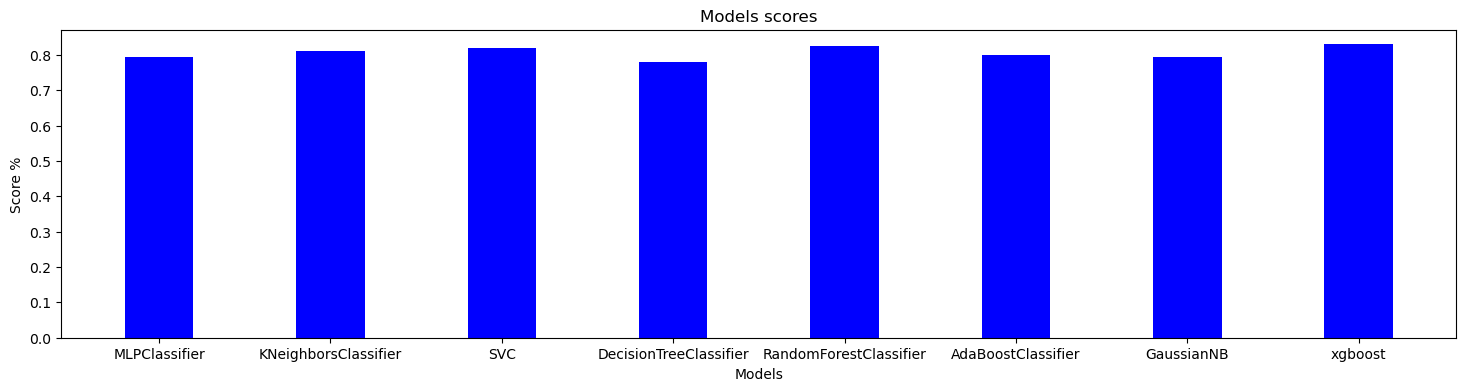

In [28]:
Models = list(Models_Results.keys())
Scores = list(Models_Results.values())
  
fig = plt.figure(figsize = (18, 4))
plt.bar(Models, Scores, color ='blue',width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Score %")
plt.title("Models scores")
plt.show()

## Best Model

In [29]:
best_model = max(Models_Results, key=Models_Results.get)
print(best_model,'value is: ',Models_Results.get(best_model),'%')

xgboost value is:  0.8295964125560538 %


## Model Insights

### Feature Importances

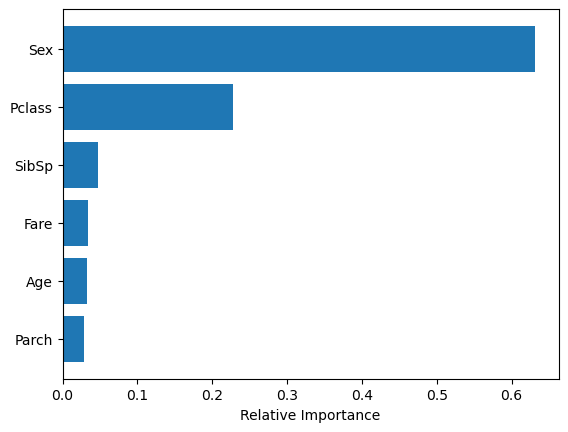

In [30]:
shap.initjs()
importances = XGB.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Average impacat on model output

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


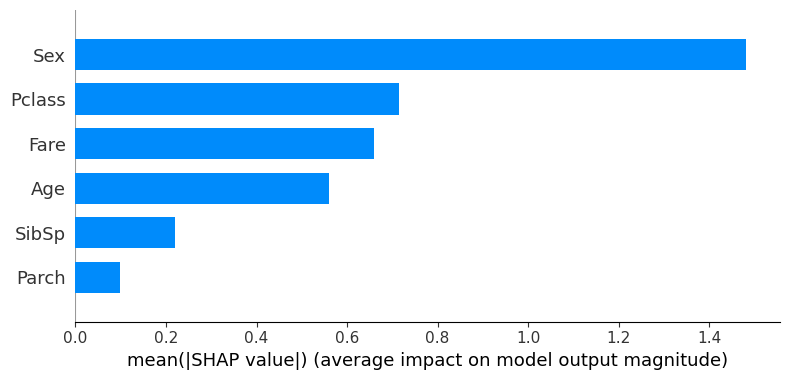

In [31]:
explainer = shap.TreeExplainer(XGB)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap.TreeExplainer(XGB).shap_values(X_train), X_train, feature_names=features, plot_type="bar")

## Conclusion

In conclusion, after analyzing the data, it was determined that not all of the features were important in predicting the outcome. However, the models' results were excellent, with the most significant parameters being the learning rate, max depth, and number of estimators. Unexpectedly, the features that had the greatest impact on the survival of individuals were sex, passenger class, and age.